# Introduction to Bayesian Inference (1)

Some introductory concepts about Bayes' theorem and priors, with an example.  
You should be already familiar with the concepts of 
* conditional / unconditional probabilities
* probability distributions

for this notebook.  


### Contents
1. Bayesian and Frequentist Philosophy
2. Bayes' Theorem  
    2.1 A Recap from Elementary Statistics  
    2.2 Bayesian Inference for Random Variables  
    2.3 Priors
3. Example: Modelling Conversion-Rates with the Beta-Binomial-Model

## 1. Bayesian and Frequentist Philosophy
The fundamental difference arises from the interpreation of the term *probability*. 

**Frequentism:**  
* Probabilities: are treated as a measure from repeatable experiments.
* Parameters are fixed variables, data are random variables
* The more recent path of statistics, mainly based on concepts from e.g. *Fisher* and *Pearson*. 

**Bayesian**
* Probabilities: are treated as a degree of belief.
* Parameters are random variables, data are fixed.
* Including the concept of priors / Bayesian updating: Starting with some beliefs about the data (the prior), update that belief by considering the actual data.

## 2. Bayes' Theorem
The heart of Bayesian statistics forms *Bayes' theorem*. 

### 2.1 A Recap from Elementary Statistics
Everyone who took an elementary courses in statistics has likely already seen Bayes' theorem in the form of:

\begin{align} 
P(A|B) = \frac{P(B|A) P(A)}{P(B)} \: ,
\end{align} 
where it is used to figure out conditional probabilities for *events*, e.g. what is $P(A|B)$ given that $P(B|A), P(A)$ and $P(B)$ are known.  

**A typical example:**  

Assuming the following statistics:
* 1% of women have breast cancer
* 95% of mammograms detect breast cancer when it is there (true positive)
* 15% of mammograms detect breast cancer when it’s not there (false positive)

what is the probability of having cancer, given that the mammogram results are positive?  

* Let's say that having cancer is event *A*, thus $P(A) = 0.01$ 
* Then the conditional probability of a positive result, given a woman has cancer is $P(B|A) = 0.95$ 
* To goal here is to calculate $P(A|B)$, therefore we need $P(B)$
* To calculate $P(B)$ we can use the law of total probability, thus $P(B) = P(B|A) P(A) + P(B|\bar{A}) P(\bar{A})$, which would be in this case $P(B) = 0.9 \times 0.01 + 0.15 \times 0.99 = 0.158 $ 
* Note: $P(\bar{A})$ is the probability of *not* A, here it is *not having cancer*: $ P(\bar{A}) = 1-P(A) = 0.99$
* Put it all into Bayes' theorem gives us the result $P(A|B) = \frac{0.9 \times 0.01}{0.158} = 0.06$
<br>
<br>

### 2.2 Bayesian Inference for Random Variables
While the example above is clearly helpful in order to understand the relationship between the components from Bayes' theorem, the assumption of fixed probabilites is quite strict. In a more practical scenario, the variables, e.g. $P(A)$ or $P(A|B)$, are treated probabilistic, i.e. as random variables which follow (or come from) a probability distribution.  

For convenience, let's adjust the notation. As usual, $\mathbf\theta$ is used to denote a parameter vector, containing the $k-$parameters $\mathbf\theta = (\theta_0, \theta_1, \dots, \theta_k)$. $\mathcal{D}$ refers to a dataset, e.g. $\mathcal{D} = \{{\mathbf X}\}$ would be a dataset containing the data matrix $\mathbf X \in \mathbb{R}^{m \times n}$ with $n$ training examples $\mathbf x_i$, where $\mathbf x_i \in \mathbb{R}^{m}$, and $m$ features.  

Now, we can rewrite Bayes' theorem as:

\begin{align} 
p(\mathbf\theta|\mathcal{D}) = \frac{p(\mathcal{D}|\mathbf\theta)  p(\mathbf\theta)}{p(\mathcal{D})} \: .
\end{align} 

where:  
* $p(\mathbf\theta)$ is the *prior* distribution of the parameter(s) $\mathbf\theta$, which is the belief about $\mathbf\theta$, before observing the data $\mathcal{D}$.  
* $p(\mathcal{D}|\mathbf\theta)$ is the *likelihood* function of $\mathbf\theta$.  
* $p(\mathbf\theta|\mathcal{D})$ is the *posterior* distribution over $\mathbf\theta$, after observing the data $\mathcal{D}$.  
* $p(\mathcal{D})$ is the *evidence*, which is a normalization constant, to ensure the posterior is a valid probability distribution. It can be obtained (for continuous distributions) with:

\begin{align} 
p(\mathcal{D}) = \int{p(\mathcal{D}|\mathbf\theta) p(\mathbf\theta)}d\mathbf\theta \: .
\end{align}

Performing this integration is known as *marginalisation*, respectively *marginalising* the likelihood over $\mathbf\theta$. For that reason, the evidence is sometimes referred as *marginal likelihood*. Whereas for simple models with *conjugate* priors this integral can be solved analytically, it is not possible to do so with more complex models and *non-conjugate* priors. Unfortunately, for complex models, this integral is usually high dimensional and hence, very difficult to compute.  
A conjugate prior is a prior that belongs to the same family of distributions, and thus, a non-conjugate prior does not.   
Computing the posterior distribution $p(\mathbf\theta|\mathcal{D})$ is called *inference*. The posterior is proportional to the likelihood $\times$ prior:

\begin{align} 
p(\mathbf\theta|\mathcal{D}) \propto p(\mathcal{D}|\mathbf\theta)  p(\mathbf\theta) \: .
\end{align} 

### 2.3 Priors
One of the key elements in Bayesian modelling is the incorporation of a prior, which can be a major benefit, but likewise awfully confusing. It is the expression of the modeler's belief, or knowledge, *before* observing the data. Priors can be divided into *informative* and *non-informative* types, albeit the term *non-informative* is misleading, insomuch as all priors contain a certain level of information. Thus, it is more appropriate use the terms *diffuse* or *vague* prior.  

As a result, it is possible to incorporate e.g. expert knowledge or use the posterior from a previous, alternative related, experiment. If there is no rational reason to use an informative prior, it is convenient to select a diffuse prior, e.g. an uniform distribution.

### 3. Example: Modelling Conversion-Rates with the Beta-Binomial-Model
Now that we know the basic theoretical concepts, let's see how we can use Bayesian inference in practice.  

In this example we are going to model *conversion rates*, which describes how many visitors of a online-shop actually buy something. For example: If we have 100 visitors from which 3 buy something, the conversion rate would be 3%.  

A simple approach to start is the *Beta-Binomial-Model*, which uses the well-known *binomial* distribution as the likelihood function. The probability mass function (pmf) for the binomial distribution:

\begin{align} 
B(k,n,p) = \binom{n}{k} p^k (1-p)^{n - k} \quad \text{for}\: \:  k = 0, 1, 2, \dots , n
\end{align}

requires three parameters: $k$ is the number of success from $n$ trials, whereas $p$ is the probability of success on a single trial.  
Therefore, the binomial distribution can be used for modelling count data, which suits our problem.  

In order to perform Bayesian inference analytically, it is required to use a conjugate prior. The conjugate prior for the binomial distribution is the *beta* distribution, which has two parameters: $\alpha$ and $\beta$.  

Note that while the binomial distribution is a discrete probability distribution, the beta distribution is continuous.  

Let's plot the Beta distribution for some arbitrary values for $\alpha$ and $\beta$, since its pdf is rather not intuitive:

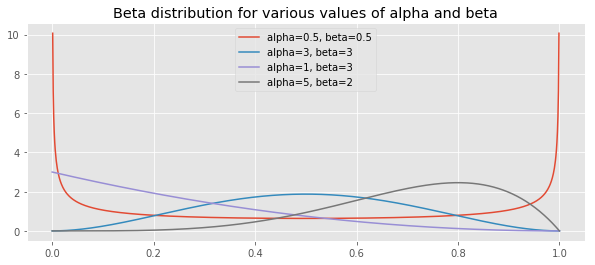

In [21]:
import numpy as np
from scipy.stats import beta, binom
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')
from pylab import rcParams
rcParams['figure.figsize'] = (10, 4)

vals = [(.5, .5), (3, 3), (1, 3), (5, 2)]
x = np.linspace(0,1,1001)

for a, b in vals:
    beta_pdf = [beta.pdf(x=p, a=a, b=b) for p in x]
    plt.plot(x, beta_pdf, label='alpha={}, beta={}'.format(a,b))
plt.title('Beta distribution for various values of alpha and beta')
plt.legend();

We can see that the Beta distribution is highly flexible, while beeing always positive. This makes sense for our purposes, since the conversion rate can't be negative.    

**Scenario:**  

Now let's assume that we just started our online business yesterday (t=1) and counted 16 visitors, from which 7 bought something. The *empirical* conversion rate (CVR) for time $t$ can be calculated with: $CVR_t = \frac{\#conversions_t}{\#visitors_t}$ .

In [3]:
visitors_1 = n_1 = 16
conversions_1 = k_1 = 7

cvr_1 = conversions_1/visitors_1
print('The conversion rate yesterday was {:.2%} %'.format(cvr_1))

The conversion rate yesterday was 43.75% %


We can now use the number of visitors and conversions to calculate the binomial likelihood function $p(\mathcal{D}|\mathbf\theta)$ for various values for the parameter $\mathbf\theta = (p_{\, binomial})$. Since we know that $p_{\, binomial}$ is a probability, we could use $[0, 1]$ as values.  
The likelihood functions shows us *how likely* we are going to see our Data $\mathcal{D}$, given the parameters $\mathbf\theta$ (Note: the parameters $k$ and $n$ are fixed here).  

**Hint:** We could calculate $\operatorname*{arg~max}_\theta ~ p(\mathcal{D}|\mathbf\theta)$, i.e. finding the value of $\theta$ that maximizes the function $p(\mathcal{D}|\mathbf\theta)$. This would be the frequentist approach of parameter estimation, the well-known *Maximum-Likelihood Estimation* (MLE). It this case the MLE would just be $\frac{k}{n} = 0.4375$, which is the mean of the binomial distribution.  


A visual representation of the likelihood function would be:

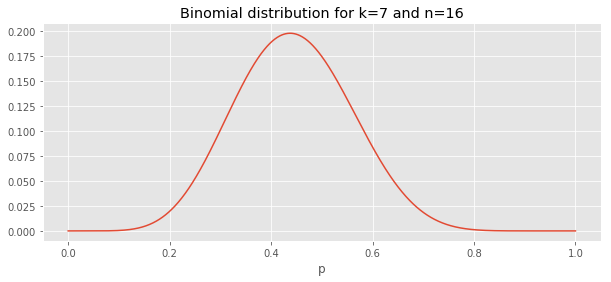

In [22]:
binom_pdf = [binom.pmf(k=k_1, n=n_1, p=p) for p in x]
plt.plot(x, binom_pdf)
plt.title('Binomial distribution for k=7 and n=16')
plt.xlabel('p');

OK great, we have some intuition about the distribution from our collected data. However, there is one issue here: If you're not already familiar with CVR's: Typical values are in the range of 1-3%.  

Let's assume we want to know if our online business is actually successful. If we take only the CVR of 43.75 % into account, then yes - definitely! But since we know that CVR's are usually far away from such numbers, it seems a bit unlikely that we can expect to see such CVR's in the future. To get a better estimate about the *true* CVR, we can incooperate this expert knowledge as our prior.  

For that, we are going to use the Beta distribution and thus, we need to specify values for $\alpha$ and $\beta$. But how do we determine these values? - This is a highly subjective task, however, we could just arrange the parameters $\alpha$ and $\beta$ until it looks reasonable:

Mean: 3.6145%


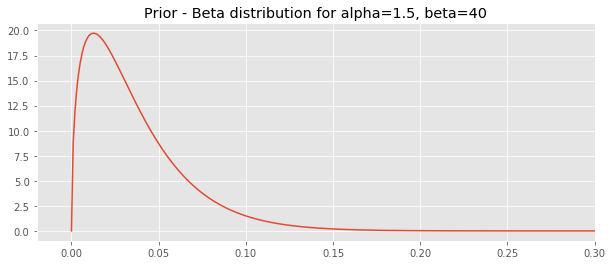

In [23]:
a, b = (1.5, 40)

print('Mean: {:0.4%}'.format(beta.mean(a,b)))

prior = [beta.pdf(x=p, a=a, b=b) for p in x]
plt.plot(x, prior)
plt.title('Prior - Beta distribution for alpha={}, beta={}'.format(a,b))
plt.xlim((-.02, 0.3));

For $CVR_{prior} \sim Beta(\alpha=1.5, \beta=40)$ we would expect a mean CVR of ca. 3.6% and a highly decreasing probability of a CVR $> 5\% $, which sounds quite realistic.  

To sum it up, we now have:
* The binomial likelihood function
* The beta prior  

Thus, we only need the *evidence* $p(\mathcal{D})$ to calculate the posterior $p(\mathbf\theta|\mathcal{D})$. The derivation is rather not straightforward, but for the conjugate beta prior the evidence is just: 

\begin{align}
p(\mathcal{D}) = B(k+\alpha_{prior}, n-k+\beta_{prior}),
\end{align}

where $B$ is the *beta function* $B(x,y) = \frac{\Gamma(x)\Gamma(y)}{\Gamma(x+y)}$, with the *gamma function* $\Gamma(z) = (z-1)! \:$.

Solving this for the posterior leads to the analytical solution: 

\begin{align}
p(\mathbf\theta|\mathcal{D}) \sim Beta(k+\alpha_{prior}, n-k+\beta_{prior})
\end{align}

Now that we got the likelihood, the prior and the posterior, we can plot everything: 

Posterior mean: 13.4865%


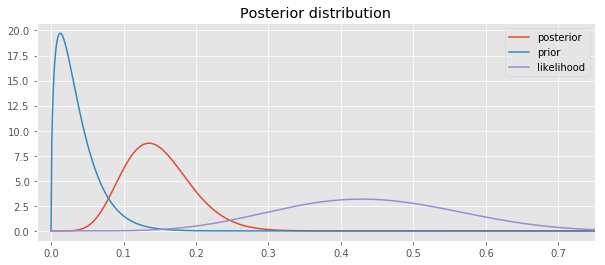

In [24]:
posterior_1 = [beta.pdf(x=p, a=(k_1+a), b=(n_1-k_1+b)) for p in x]
plt.plot(x, posterior_1, label='posterior')
plt.plot(x, prior, label='prior')
plt.plot(x, [beta.pdf(x=p, a=k_1, b=(n_1-k_1)) for p in x], label='likelihood')
plt.title('Posterior distribution'.format(a,b))
plt.xlim((-.02, 0.75))
plt.legend();

print('Posterior mean: {:0.4%}'.format(np.argmax(posterior_1)/len(x)))

Here we can clearly see that the posterior is between our prior and likelihood, which makes intuitively sense.  
The results indicate that the performance is still good, but if given our prior, we would expect the true CVR to be around 13.5% .  

Note: I changed the likelihood function here from the binomial to the Beta with $\sim Beta(k, n-k)$ to get the same density range for plotting all functions togheter. This does not affect the results, both have the same mean.  

But what happens if we are wrong about our prior? Yesterday we had just 16 visitor and thus, there is a high chance that our 43.75% CVR is just a random effect. But what if we would get the same proportion of visitors and conversions, just from let's say 20 times the number of people, such that we have 320 visitors, from which 140 buy something? It's the same empirical CVR, but we should be much more confident that our data is not just due to random effects.  

The following example shows the posterior for various *multipliers* of the visitors and conversions:

Posterior mean for multiplier 2 is: 20.2797%
Posterior mean for multiplier 5 is: 29.6703%
Posterior mean for multiplier 20 is: 39.0609%
Posterior mean for multiplier 50 is: 41.7582%


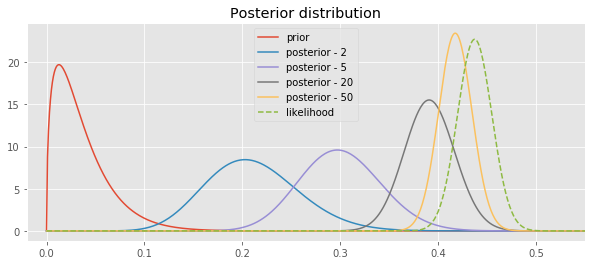

In [25]:
plt.plot(x, prior, label='prior')
for multiplier in [2, 5, 20, 50]:
    n_2 = n_1*multiplier
    k_2 = k_1*multiplier
    posterior_2 = [beta.pdf(x=p, a=(k_2+a), b=(n_2-k_2+b)) for p in x]
    plt.plot(x, posterior_2, label='posterior - {}'.format(multiplier))
    print('Posterior mean for multiplier {} is: {:0.4%}'.format(multiplier, 
                                                                np.argmax(posterior_2)/len(x)))
plt.plot(x, [beta.pdf(x=p, a=k_2, b=(n_2-k_2)) for p in x], '--', label='likelihood')
plt.title('Posterior distribution'.format(a,b))
plt.xlim((-.02, 0.55))
plt.legend();

This demonstrates the decreasing influence of the prior if more data becomes available. Note that I've plotted the likelihood only for the $50 \times$ multiplier here to avoid confusions, but it also becomes much sharper.  
<br>

### Outlook
Check out the next part of this series in the notebook **- Introduction to Bayesian Inference (2) -** for more sophisticated models by using *Probabilistic Programming*.

## References
**Note:** Parts from this notebook are from my thesis - *A Bayesian Approach to Machine Learning for Algorithmic Trading* (2019).  

[1] Barber, D. (2012). Bayesian reasoning and machine learning. Cambridge University Press.  
[2] Bishop, C. M. (2006). Pattern recognition and machine learning (information science and statistics). Berlin, Heidelberg: Springer-Verlag.  
[3] Gelman, A., et al. (2013). Bayesian Data Analysis (2nd ed.). Chapman & Hall/CRC.  
[4] Murphy, K. P. (2013). Machine learning : a probabilistic perspective. Cambridge, Mass. [u.a.]: MIT Press.  
[5] Theodoridis, S. (2015). Machine learning: A bayesian and optimization perspective (1st ed.). Orlando, FL, USA: Academic Press, Inc.  